<a href="https://colab.research.google.com/github/Meet200/Machine_Learning-/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [19]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal_length','sepal_width','petal_length','petal_width','class']
dataset = pd.read_csv(url, names=names)
print(dataset)

     sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [20]:
dataset = dataset.sample(frac=1)
print(dataset)
accuracy_all = []
k_neighbour = []

     sepal_length  sepal_width  petal_length  petal_width            class
100           6.3          3.3           6.0          2.5   Iris-virginica
60            5.0          2.0           3.5          1.0  Iris-versicolor
131           7.9          3.8           6.4          2.0   Iris-virginica
46            5.1          3.8           1.6          0.2      Iris-setosa
79            5.7          2.6           3.5          1.0  Iris-versicolor
..            ...          ...           ...          ...              ...
59            5.2          2.7           3.9          1.4  Iris-versicolor
15            5.7          4.4           1.5          0.4      Iris-setosa
58            6.6          2.9           4.6          1.3  Iris-versicolor
8             4.4          2.9           1.4          0.2      Iris-setosa
53            5.5          2.3           4.0          1.3  Iris-versicolor

[150 rows x 5 columns]


In [21]:
 num_neighbors = 25
 k_neighbour.append(num_neighbors)
 lim = (dataset.shape[0] * 80 ) / 100
 lim = math.floor(lim)
 lim

120

In [22]:
training=dataset.values[0:lim,0:4]
training

array([[6.3, 3.3, 6.0, 2.5],
       [5.0, 2.0, 3.5, 1.0],
       [7.9, 3.8, 6.4, 2.0],
       [5.1, 3.8, 1.6, 0.2],
       [5.7, 2.6, 3.5, 1.0],
       [7.1, 3.0, 5.9, 2.1],
       [5.8, 2.7, 5.1, 1.9],
       [5.5, 2.4, 3.7, 1.0],
       [6.5, 3.0, 5.2, 2.0],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.4, 2.1],
       [5.5, 2.4, 3.8, 1.1],
       [4.8, 3.1, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [5.1, 3.4, 1.5, 0.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.6, 3.0, 4.5, 1.5],
       [4.7, 3.2, 1.6, 0.2],
       [7.2, 3.2, 6.0, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [5.5, 2.6, 4.4, 1.2],
       [5.9, 3.2, 4.8, 1.8],
       [5.1, 3.3, 1.7, 0.5],
       [5.0, 3.0, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.0, 3.4, 1.5, 0.2],
       [6.7, 3.0, 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.4, 2.7, 5.3, 1.9],
       [5.1, 3.5, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [5.7, 2.8, 4.5, 1.3],
       [5.8, 2

In [6]:
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column])

In [7]:
for i in range(len(training[0])):
  str_column_to_float(training,i)

training

array([[4.8, 3.0, 1.4, 0.1],
       [5.7, 2.8, 4.1, 1.3],
       [7.7, 2.6, 6.9, 2.3],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.6, 4.4, 1.2],
       [6.7, 3.0, 5.2, 2.3],
       [6.4, 2.7, 5.3, 1.9],
       [6.0, 2.2, 4.0, 1.0],
       [7.3, 2.9, 6.3, 1.8],
       [4.8, 3.1, 1.6, 0.2],
       [5.1, 3.5, 1.4, 0.2],
       [6.7, 3.1, 4.7, 1.5],
       [5.6, 3.0, 4.1, 1.3],
       [6.9, 3.1, 4.9, 1.5],
       [6.2, 2.8, 4.8, 1.8],
       [5.9, 3.2, 4.8, 1.8],
       [6.0, 2.9, 4.5, 1.5],
       [5.0, 3.3, 1.4, 0.2],
       [6.7, 3.0, 5.0, 1.7],
       [6.0, 2.2, 5.0, 1.5],
       [4.6, 3.1, 1.5, 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [7.7, 2.8, 6.7, 2.0],
       [6.4, 2.8, 5.6, 2.2],
       [6.0, 3.0, 4.8, 1.8],
       [4.9, 3.1, 1.5, 0.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.1, 2.8, 4.0, 1.3],
       [5.8, 2.6, 4.0, 1.2],
       [6.8, 3.0, 5.5, 2.1],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.8, 4.9, 2.0],
       [6.5, 3.0, 5.5, 1.8],
       [4.4, 3

In [8]:
trainingclass=dataset.values[0:lim,-1]
trainingclass

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setos

In [9]:
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return (math.sqrt(distance))

In [10]:
testing=dataset.values[lim:dataset.shape[0],0:4]
testing

array([[6.0, 2.7, 5.1, 1.6],
       [6.7, 3.3, 5.7, 2.1],
       [6.3, 2.5, 5.0, 1.9],
       [5.0, 3.2, 1.2, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [6.9, 3.1, 5.4, 2.1],
       [5.4, 3.4, 1.7, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.7, 4.4, 1.5, 0.4],
       [5.3, 3.7, 1.5, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [4.8, 3.0, 1.4, 0.3],
       [5.8, 2.8, 5.1, 2.4],
       [6.9, 3.2, 5.7, 2.3],
       [6.5, 3.2, 5.1, 2.0],
       [5.2, 2.7, 3.9, 1.4],
       [6.7, 3.3, 5.7, 2.5],
       [6.1, 2.8, 4.7, 1.2],
       [5.1, 3.5, 1.4, 0.3],
       [5.0, 2.0, 3.5, 1.0],
       [6.4, 3.2, 4.5, 1.5],
       [7.0, 3.2, 4.7, 1.4],
       [5.9, 3.0, 5.1, 1.8],
       [4.6, 3.6, 1.0, 0.2],
       [6.3, 3.3, 6.0, 2.5],
       [4.7, 3.2, 1.3, 0.2],
       [5.5, 2.4, 3.7, 1.0],
       [6.6, 3.0, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4]], dtype=object)

In [11]:
for i in range(len(testing[0])):
  str_column_to_float(testing,i)

testing

array([[6.0, 2.7, 5.1, 1.6],
       [6.7, 3.3, 5.7, 2.1],
       [6.3, 2.5, 5.0, 1.9],
       [5.0, 3.2, 1.2, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [6.9, 3.1, 5.4, 2.1],
       [5.4, 3.4, 1.7, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.7, 4.4, 1.5, 0.4],
       [5.3, 3.7, 1.5, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [4.8, 3.0, 1.4, 0.3],
       [5.8, 2.8, 5.1, 2.4],
       [6.9, 3.2, 5.7, 2.3],
       [6.5, 3.2, 5.1, 2.0],
       [5.2, 2.7, 3.9, 1.4],
       [6.7, 3.3, 5.7, 2.5],
       [6.1, 2.8, 4.7, 1.2],
       [5.1, 3.5, 1.4, 0.3],
       [5.0, 2.0, 3.5, 1.0],
       [6.4, 3.2, 4.5, 1.5],
       [7.0, 3.2, 4.7, 1.4],
       [5.9, 3.0, 5.1, 1.8],
       [4.6, 3.6, 1.0, 0.2],
       [6.3, 3.3, 6.0, 2.5],
       [4.7, 3.2, 1.3, 0.2],
       [5.5, 2.4, 3.7, 1.0],
       [6.6, 3.0, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4]], dtype=object)

In [12]:
testingclass = dataset.values[lim:dataset.shape[0],-1]
testingclass

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [13]:
unique_list=[]
for x in trainingclass:
  if x not in unique_list:
    unique_list.append(x)

print(unique_list)
for i in range(len(trainingclass)):
  for k in range(len(unique_list)):
    if(trainingclass[i]==unique_list[k]):
      trainingclass[i]=k
print(trainingclass)

for i in range(len(testingclass)):
  for k in range(len(unique_list)):
    if(testingclass[i]==unique_list[k]):
      testingclass[i]=k
print(testingclass)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
[0 1 2 1 1 2 2 1 2 0 0 1 1 1 2 1 1 0 1 2 0 0 0 2 2 2 0 1 1 1 2 2 2 2 0 1 2
 2 0 0 1 2 2 2 2 2 2 1 0 0 0 1 1 1 1 0 1 1 1 1 2 2 0 0 0 2 0 2 0 1 2 2 0 2
 2 1 1 1 0 1 1 2 2 2 0 2 1 2 0 2 1 2 0 0 1 0 1 1 1 0 2 2 1 1 2 0 2 0 1 1 2
 0 0 0 0 0 1 0 1 0]
[1 2 2 0 0 2 0 0 0 0 0 0 2 2 2 1 2 1 0 1 1 1 2 0 2 0 1 1 0 0]


In [14]:
distance_all=[]
for j in range(len(testing)):
  distance = []
  for i in range(len(training)):
    distance.append([euclidean_distance((training[i]),(testing[j])),trainingclass[i]])
  distance = sorted(distance,key=lambda l:l[0])
  distance_all.append(distance)
distance_all

[[[0.20000000000000018, 2],
  [0.20000000000000018, 2],
  [0.31622776601683766, 2],
  [0.3605551275463984, 2],
  [0.3741657386773935, 2],
  [0.374165738677394, 2],
  [0.374165738677394, 2],
  [0.4123105625617657, 1],
  [0.4242640687119283, 2],
  [0.4472135954999583, 2],
  [0.4582575694955834, 1],
  [0.4582575694955839, 2],
  [0.5099019513592784, 2],
  [0.5196152422706631, 2],
  [0.5916079783099615, 1],
  [0.5916079783099615, 1],
  [0.5916079783099616, 2],
  [0.6164414002968974, 2],
  [0.6324555320336754, 1],
  [0.6480740698407862, 2],
  [0.6480740698407862, 2],
  [0.6708203932499371, 2],
  [0.6782329983125264, 1],
  [0.6928203230275513, 2],
  [0.7071067811865477, 2],
  [0.714142842854285, 1],
  [0.7681145747868608, 1],
  [0.768114574786861, 2],
  [0.7810249675906649, 1],
  [0.7810249675906653, 1],
  [0.7874007874011811, 2],
  [0.8062257748298546, 1],
  [0.8062257748298548, 1],
  [0.8485281374238568, 1],
  [0.8602325267042622, 1],
  [0.8602325267042623, 1],
  [0.866025403784438, 1],
  [

In [15]:
mat = []
for j in range(len(testing)):
  identify=[0 for i in range(len(unique_list))]
  for i in range(num_neighbors):
    identify[distance_all[j][i][1]]=identify[distance_all[j][i][1]]+1
    print(identify)
  mat.append(identify.index(max(identify)))
  print("The predicted class is: ",unique_list[identify.index(max(identify))])
mat

[0, 0, 1]
[0, 0, 2]
[0, 0, 3]
[0, 0, 4]
[0, 0, 5]
[0, 0, 6]
[0, 0, 7]
[0, 1, 7]
[0, 1, 8]
[0, 1, 9]
[0, 2, 9]
[0, 2, 10]
[0, 2, 11]
[0, 2, 12]
[0, 3, 12]
[0, 4, 12]
[0, 4, 13]
[0, 4, 14]
[0, 5, 14]
[0, 5, 15]
[0, 5, 16]
[0, 5, 17]
[0, 6, 17]
[0, 6, 18]
[0, 6, 19]
The predicted class is:  Iris-virginica
[0, 0, 1]
[0, 0, 2]
[0, 0, 3]
[0, 0, 4]
[0, 0, 5]
[0, 0, 6]
[0, 0, 7]
[0, 0, 8]
[0, 0, 9]
[0, 0, 10]
[0, 0, 11]
[0, 0, 12]
[0, 0, 13]
[0, 0, 14]
[0, 0, 15]
[0, 0, 16]
[0, 0, 17]
[0, 0, 18]
[0, 0, 19]
[0, 1, 19]
[0, 1, 20]
[0, 1, 21]
[0, 2, 21]
[0, 2, 22]
[0, 2, 23]
The predicted class is:  Iris-virginica
[0, 1, 0]
[0, 1, 1]
[0, 1, 2]
[0, 1, 3]
[0, 1, 4]
[0, 1, 5]
[0, 2, 5]
[0, 3, 5]
[0, 3, 6]
[0, 3, 7]
[0, 3, 8]
[0, 3, 9]
[0, 4, 9]
[0, 4, 10]
[0, 4, 11]
[0, 5, 11]
[0, 6, 11]
[0, 6, 12]
[0, 7, 12]
[0, 8, 12]
[0, 8, 13]
[0, 9, 13]
[0, 9, 14]
[0, 9, 15]
[0, 10, 15]
The predicted class is:  Iris-virginica
[1, 0, 0]
[2, 0, 0]
[3, 0, 0]
[4, 0, 0]
[5, 0, 0]
[6, 0, 0]
[7, 0, 0]
[8, 0, 0]
[9, 0, 

[2,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 0,
 1,
 1,
 2,
 2,
 0,
 2,
 0,
 1,
 1,
 0,
 0]

In [16]:
confusion_mat = [[0,0,0],[0,0,0],[0,0,0]]
print(testingclass)
print(np.array(mat))
for i in range(len(testingclass)):
  confusion_mat[testingclass[i]][mat[i]] = confusion_mat[testingclass[i]][mat[i]] + 1
print("Confusion matrix ",confusion_mat)
diagonal = 0
total = 0
for i in range(len(confusion_mat)):
  for j in range(len(confusion_mat)):
    if(i == j):
      diagonal += confusion_mat[i][j]
    total += confusion_mat[i][j]
accuracy_score = (diagonal / total) * 100
print("Accuracy is ",accuracy_score)
accuracy_all.append(accuracy_score)

[1 2 2 0 0 2 0 0 0 0 0 0 2 2 2 1 2 1 0 1 1 1 2 0 2 0 1 1 0 0]
[2 2 2 0 0 2 0 0 0 0 0 0 2 2 2 1 2 1 0 1 1 2 2 0 2 0 1 1 0 0]
Confusion matrix  [[13, 0, 0], [0, 6, 2], [0, 0, 9]]
Accuracy is  93.33333333333333


ValueError: ignored

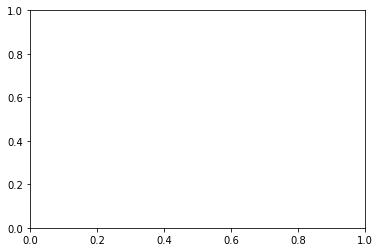

In [24]:
plt.scatter(k_neighbour,accuracy_all,c="r")
plt.xlabel("K Neighbour")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, 26, step=1))
plt.show()

Load the data

---


Initialize K to your chosen number of neighbors

---


Calculate the Euclidian distance

---


Sort the ordered collection of distances and indices in ascending order by the distances

---


Pick the first K entries from the sorted collection

---


Get the labels of the selected K entries

---


In classification, return the mode of the K labels


### 1.   As we decrease the value of K to 1, our predictions become less stable.
### 2.   as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions
### 3.   In cases where we are taking a majority vote among labels, we usually make K an odd number to have a tiebreaker. 

